In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rand = default_rng().random

[]

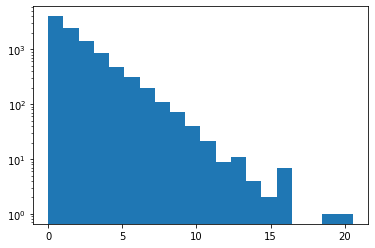

In [27]:
beta = .5
N = 10**4
u = rand(N)
y = -np.log(u)
t = y/beta

# total elapsed time
time = t.cumsum()

plt.hist(t,bins=20)
plt.semilogy()


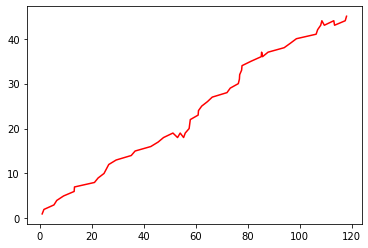

In [31]:
# probability of a step to the right
xi = 0.9

steps = 2*(rand(N) < xi) - 1
location = steps.cumsum()

cutoff = 120

plt.plot(time[time<cutoff], location[time<cutoff], 'r-')

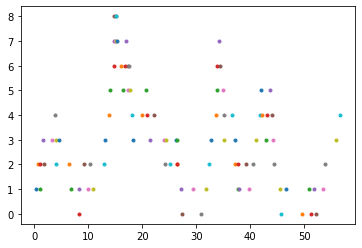

In [37]:
# Gillespie algorithm

l0 = 0
beta_birth = 1
k_death = 0.3

N = 100

l = l0
T = 0

for n in range(N):
    rate = beta_birth + k_death * l
    t = - 1/rate * np.log(rand())
    xi = beta_birth / rate
    event = rand() < xi
    if event:
        l = l+1
    else:
        l = l-1
    T = T+t
    plt.plot(T,l,'.')
    